# Gastos Rochester

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline

In [2]:
gastos = pd.read_csv('Rochester_gastos.csv')

In [3]:
gastos.tail(8)

,Fecha,Lugar,Categoria,Sub_categoria,Total
203,5/24/2020,Amazon,Unicos,Mat rompecabezas,28.07
204,5/23/2020,Pescaderia,Supermercado,Comida,18.35
205,5/27/2020,Electricidad,Servicios,Otros,35.27
206,5/29/2020,Walmart,Supermercado,Higiene,27.84
207,5/29/2020,Walmart,Supermercado,Limpieza,5.72
208,5/29/2020,Walmart,Supermercado,Otros,24.98
209,5/29/2020,Walmart,Supermercado,Comida,203.60
210,5/30/2020,Tops,Supermercado,Comida,21.88


In [4]:
gastos.dtypes

Fecha             object
Lugar             object
Categoria         object
Sub_categoria     object
Total            float64
dtype: object

In [5]:
gastos['Fecha']=pd.to_datetime(gastos['Fecha'])

In [6]:
gastos['Month']=gastos['Fecha'].dt.month

In [7]:
gastos['Day']=gastos['Fecha'].dt.day

In [8]:
gastos.shape

(211, 7)

In [9]:
gastos.groupby('Month').Total.sum()

Month
2    4522.96
3    3381.26
4    2144.38
5    2278.26
Name: Total, dtype: float64

In [10]:
categorias = gastos.groupby(['Categoria','Month']).Total.sum()

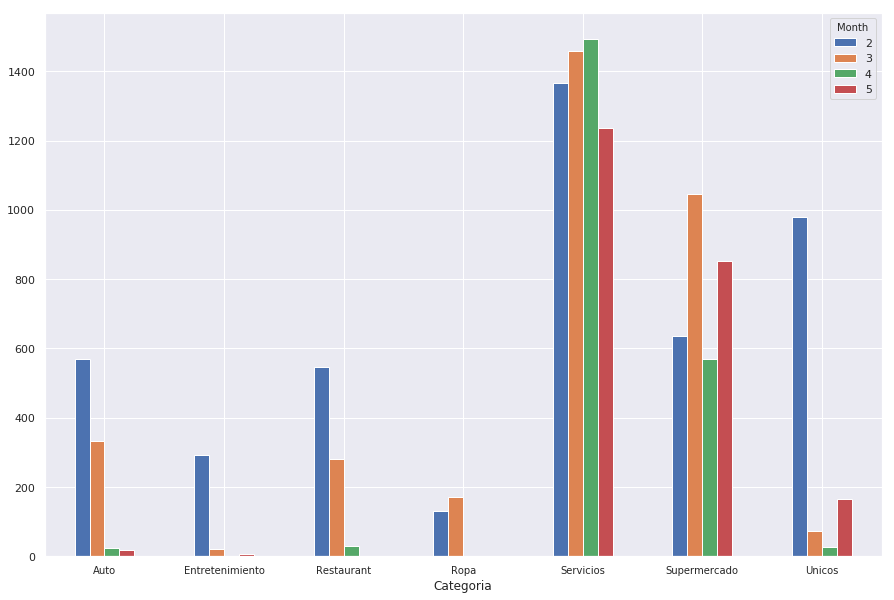

In [11]:
categorias.unstack().plot(kind='bar', stacked=False,figsize=[15,10])
plt.xticks(
    rotation=0,
   # horizontalalignment='right',
   # fontweight='light',
    fontsize='medium',
);

In [12]:
gastos.groupby(['Categoria','Sub_categoria','Month']).Total.sum()

Categoria        Sub_categoria     Month
Auto             Arreglos          2         362.65
                 Insurance         3         265.67
                 Lavado            2          23.71
                                   4          23.71
                 Nafta             2         115.75
                                   3          41.18
                                   5          18.86
                 Otros             2          43.12
                 Peajes            2          25.00
                                   3          25.00
Entretenimiento  Alquiler peli     5           5.99
                 Bowling           2          30.00
                                   3          21.00
                 Cine              2          57.80
                 Teatro            2         205.10
Restaurant       Almuerzo          2         188.35
                                   3         125.62
                 Cena              2         314.74
                       

In [15]:
#gastos[gastos.Categoria == 'Restaurant'].groupby(['Lugar']).Total.sum()

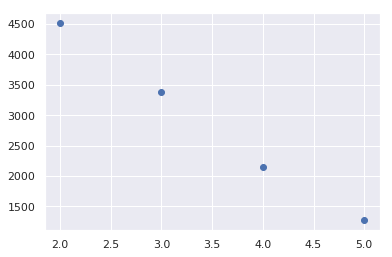

In [13]:
plt.plot(gastos.groupby('Month').Total.sum(),'o');

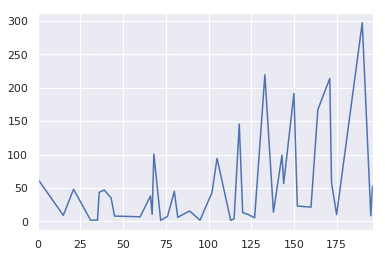

In [13]:
gastos[gastos.Sub_categoria == 'Comida'].Total.plot()

In [14]:
comida = gastos[gastos.Sub_categoria == 'Comida']

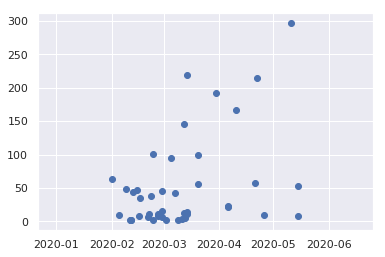

In [15]:
plt.scatter(x=comida['Fecha'],y=comida['Total'])